# King Country Real Estate Pricing

## Import and data overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

In [2]:
def col_rename(df, dict_rules, ip=True):
    ''' rename columns in data frame using a dictionary of rules  '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(dict_rules,dict):
        z = df.rename(columns = dict_rules, inplace=ip)
    else:
        raise TypeError
    return z
#
def print_unique(df,col):
    ''' gives a list of unique values in a field '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(df[col],pd.core.frame.Series):
        z = df[col].unique()
    else:
        raise TypeError
    return z
#

In [3]:
df = pd.read_csv('kc_house_data.csv') # read the housing data
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Check for nan values

In [5]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Value counts for all columns

The label takes care of identifications so we can remove 'id'. We also chose to remove date sold and year renovated.

In [7]:
df.drop(labels=['id','date','yr_renovated'],axis=1,inplace=True) # drop

In [8]:

!pwd

/Users/antares/Projects/ironhack_da/IH_MIDTERM/kingcounty_working


## Price variation across region

In [9]:
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & (df['price'] <= np.percentile(df['price'], 99.5)) & (df['lat'] >= np.percentile(df['lat'], 0.05)) &  (df['lat'] < np.percentile(df['lat'], 99.95)) &(df['long'] >= np.percentile(df['long'], 0.05)) &(df['long'] <= np.percentile(df['long'], 99.95))]

In [10]:
df['price_sqft'] = df['price']/df['sqft_living']

/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_18907/4229130723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_sqft'] = df['price']/df['sqft_living']


In [11]:
KCo_map = gpd.read_file('King_County_Political_Boundary_no_waterbodies__kingco_area.shp')
KCo_map.set_crs(epsg=4326, inplace=True)
#crs = {'init':'espc:4326'}
#crs=CRS("epsg:3857")
#KCo_map = KCo_map.to_crs(crs)
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry = geometry)


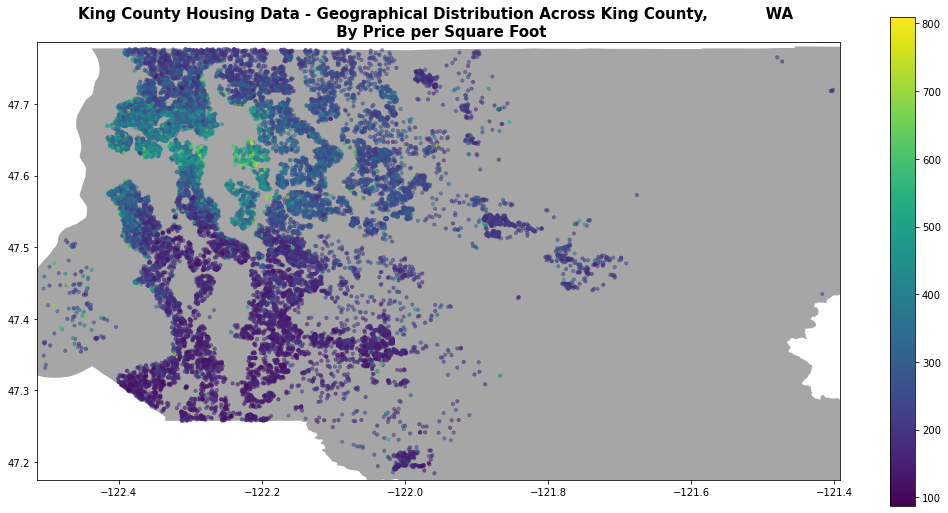

In [12]:
fig, ax = plt.subplots(figsize=(18,9))
KCo_map.plot(ax=ax, alpha=0.7,color='grey')
geo_df.plot(column=df['price_sqft'],ax=ax,alpha=0.5, legend=True,markersize=10)
plt.title('King County Housing Data - Geographical Distribution Across King County, \
          WA \n By Price per Square Foot', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(df.long.min()-0.01,df.long.max()+0.01)
plt.ylim(df.lat.min()-0.01, df.lat.max()+0.01)

plt.show()

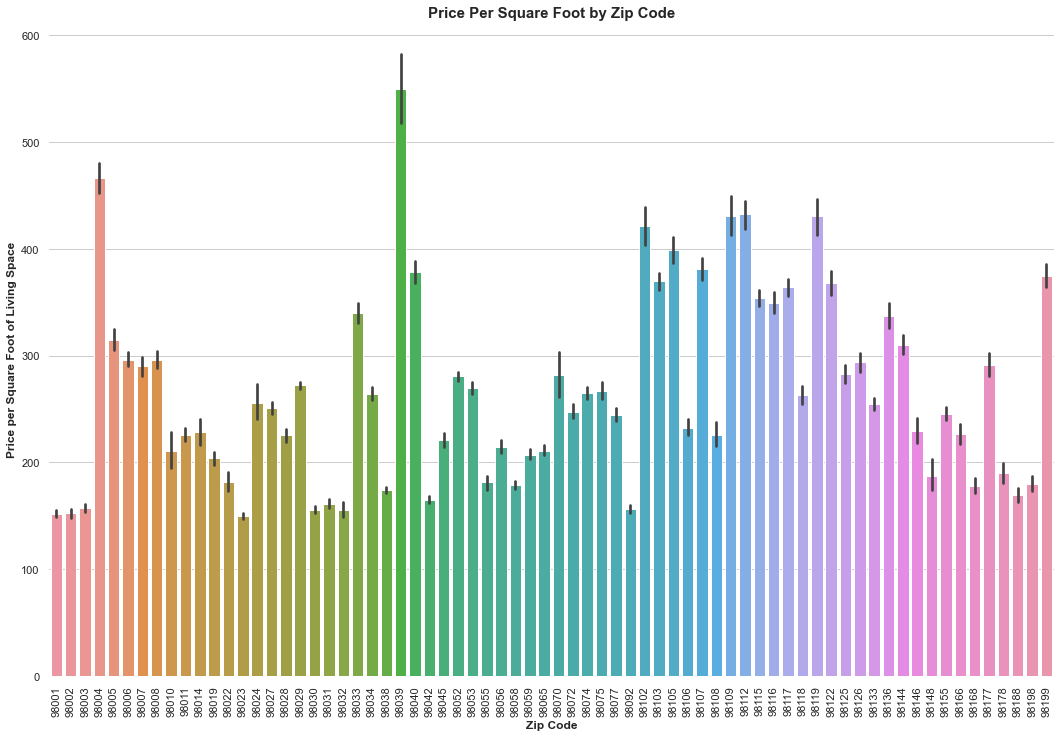

In [13]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="price_sqft", data=df, ax=ax)
ax.set_title("Price Per Square Foot by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Zip Code", fontsize=12,fontweight='bold')
ax.set_ylabel("Price per Square Foot of Living Space", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [14]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98039].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [15]:
df.drop(columns = ['lat', 'long', 'geometry', 'price_sqft'], inplace = True)


/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_18907/4103144995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['lat', 'long', 'geometry', 'price_sqft'], inplace = True)


# Correlations and statistics

In [16]:
for col in df.columns:  
    print(col, '\n', pd.concat([df[col].value_counts(normalize=True).head(20), df[col].value_counts().head(20)],axis=1,keys=('fractional %','count')),
    '\n Min:', df[col].min(), '  Max:', df[col].max(), 
    'Unique Values:', df[col].nunique(),'\n')

price 
           fractional %  count
450000.0      0.008056    172
350000.0      0.007962    170
550000.0      0.007400    158
500000.0      0.007119    152
425000.0      0.007025    150
325000.0      0.006932    148
400000.0      0.006744    144
375000.0      0.006417    137
300000.0      0.006229    133
525000.0      0.006089    130
250000.0      0.006089    130
475000.0      0.005620    120
330000.0      0.005574    119
650000.0      0.005480    117
275000.0      0.005292    113
415000.0      0.005199    111
315000.0      0.005199    111
390000.0      0.005152    110
600000.0      0.005152    110
280000.0      0.005152    110 
 Min: 134000.0   Max: 2450000.0 Unique Values: 3893 

bedrooms 
     fractional %  count
3       0.456981   9757
4       0.319704   6826
2       0.126036   2691
5       0.072924   1557
6       0.012412    265
1       0.008571    183
7       0.001686     36
0       0.000609     13
8       0.000562     12
9       0.000281      6
10      0.000141      3
11      

In [17]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.135100e+04,21351.000000,21351.000000,21351.000000,2.135100e+04,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000,21351.000000
mean,5.290363e+05,3.371786,2.110943,2069.117091,1.492309e+04,1.495035,0.005855,0.225001,3.410707,7.650742,1780.590136,288.526954,1971.131610,98077.962906,1982.645309,12608.205892
std,3.074869e+05,0.924067,0.752844,878.482452,4.070941e+04,0.540035,0.076292,0.746172,0.648959,1.143940,803.652745,434.884190,29.349918,53.379072,674.134081,26638.608699
min,1.340000e+05,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.248940e+05,3.000000,1.750000,1430.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.590000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,7605.000000
75%,6.400000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,98117.000000,2360.000000,10046.000000
max,2.450000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,98199.000000,5790.000000,871200.000000


In [18]:
features = ['price', 'sqft_above','sqft_basement', 'sqft_lot', 'sqft_living15','sqft_lot15', 'sqft_living',
            'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','zipcode']
#['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
   #    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
   #    'sqft_living15', 'sqft_lot15', 'waterfront']

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
corrm=df[features].corr()
corrm

,price,sqft_above,sqft_basement,sqft_lot,sqft_living15,sqft_lot15,sqft_living,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
price,1.000000,0.588574,0.290794,0.099973,0.599495,0.092077,0.682394,0.308813,0.508122,0.271070,0.174730,0.368851,0.035183,0.677852,0.053108,-0.046448
sqft_above,0.588574,1.000000,-0.090488,0.187949,0.727588,0.199629,0.870024,0.469853,0.671168,0.526174,0.032354,0.139894,-0.169489,0.746044,0.434465,-0.265436
sqft_basement,0.290794,-0.090488,1.000000,0.015642,0.178406,0.019407,0.412260,0.295827,0.261008,-0.260353,0.042681,0.259313,0.176018,0.138776,-0.140388,0.081430
sqft_lot,0.099973,0.187949,0.015642,1.000000,0.149748,0.723012,0.179682,0.030985,0.087878,-0.005491,0.011674,0.069217,-0.012213,0.114668,0.053659,-0.129681
sqft_living15,0.599495,0.727588,0.178406,0.149748,1.000000,0.191467,0.753930,0.382158,0.555290,0.275610,0.055253,0.262429,-0.100128,0.705253,0.329743,-0.282028
sqft_lot15,0.092077,0.199629,0.019407,0.723012,0.191467,1.000000,0.192232,0.028852,0.088337,-0.010925,0.024560,0.066598,-0.006329,0.121623,0.073042,-0.148064
sqft_living,0.682394,0.870024,0.412260,0.179682,0.753930,0.192232,1.000000,0.576277,0.743207,0.352469,0.050727,0.256349,-0.067916,0.751195,0.327959,-0.202515
bedrooms,0.308813,0.469853,0.295827,0.030985,0.382158,0.028852,0.576277,1.000000,0.507690,0.167155,-0.020910,0.068197,0.022323,0.341865,0.152220,-0.152398
bathrooms,0.508122,0.671168,0.261008,0.087878,0.555290,0.088337,0.743207,0.507690,1.000000,0.501766,0.029261,0.162863,-0.135019,0.649640,0.514610,-0.204824
floors,0.271070,0.526174,-0.260353,-0.005491,0.275610,-0.010925,0.352469,0.167155,0.501766,1.000000,0.016053,0.021196,-0.270833,0.457148,0.492821,-0.058931


In [20]:
corrm['price'].sort_values()

zipcode         -0.046448
condition        0.035183
yr_built         0.053108
sqft_lot15       0.092077
sqft_lot         0.099973
waterfront       0.174730
floors           0.271070
sqft_basement    0.290794
bedrooms         0.308813
view             0.368851
bathrooms        0.508122
sqft_above       0.588574
sqft_living15    0.599495
grade            0.677852
sqft_living      0.682394
price            1.000000
Name: price, dtype: float64

/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_18907/2306852778.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)


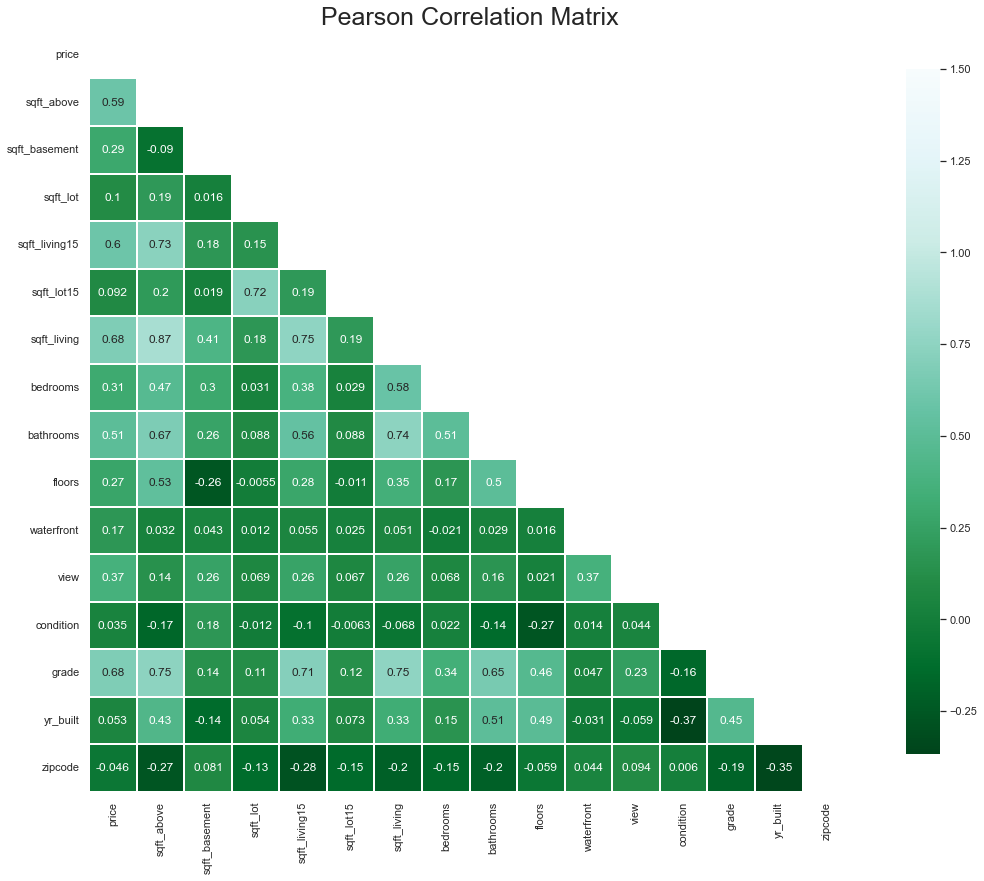

In [21]:
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.2,vmax=1.5,square=True, cmap="BuGn_r",
            linecolor='w',annot=True,annot_kws={"size":12},mask=mask,cbar_kws={"shrink": .9});

 - sqft_living and sqft_above display a multicolinearity, having a Pearson correlation of 0.88. 
 - To a lesser extent, there was some multicollinearity between sqft_living and sqft_living15 (between the living space of the house in question and the 15 closest neighbors), as well as sqft_living and grade (0.77) and sqft_above and grade (0.76). With regard to the first relationship, sqft_living has a 0.70 correlation with the target variable, price, while sqft_above only has a 0.60 correlation; this suggests we should drop sqft_above. This may also remove the multicollinearity between sqft_above and grade. Considering the strength of the sqft_living variable, it would also make sense to drop sqft_living15. The grade variable has a strong correlation with price, so despite the collinearity with sqft_living, I'll leav it in for now. Finally, it just doesn't make logical sense to keep the neighbors' lot sizes if we're dropping their living space square footage; accordingly, we'll drop that variable (sqft_lot15), as well as the preceding three.

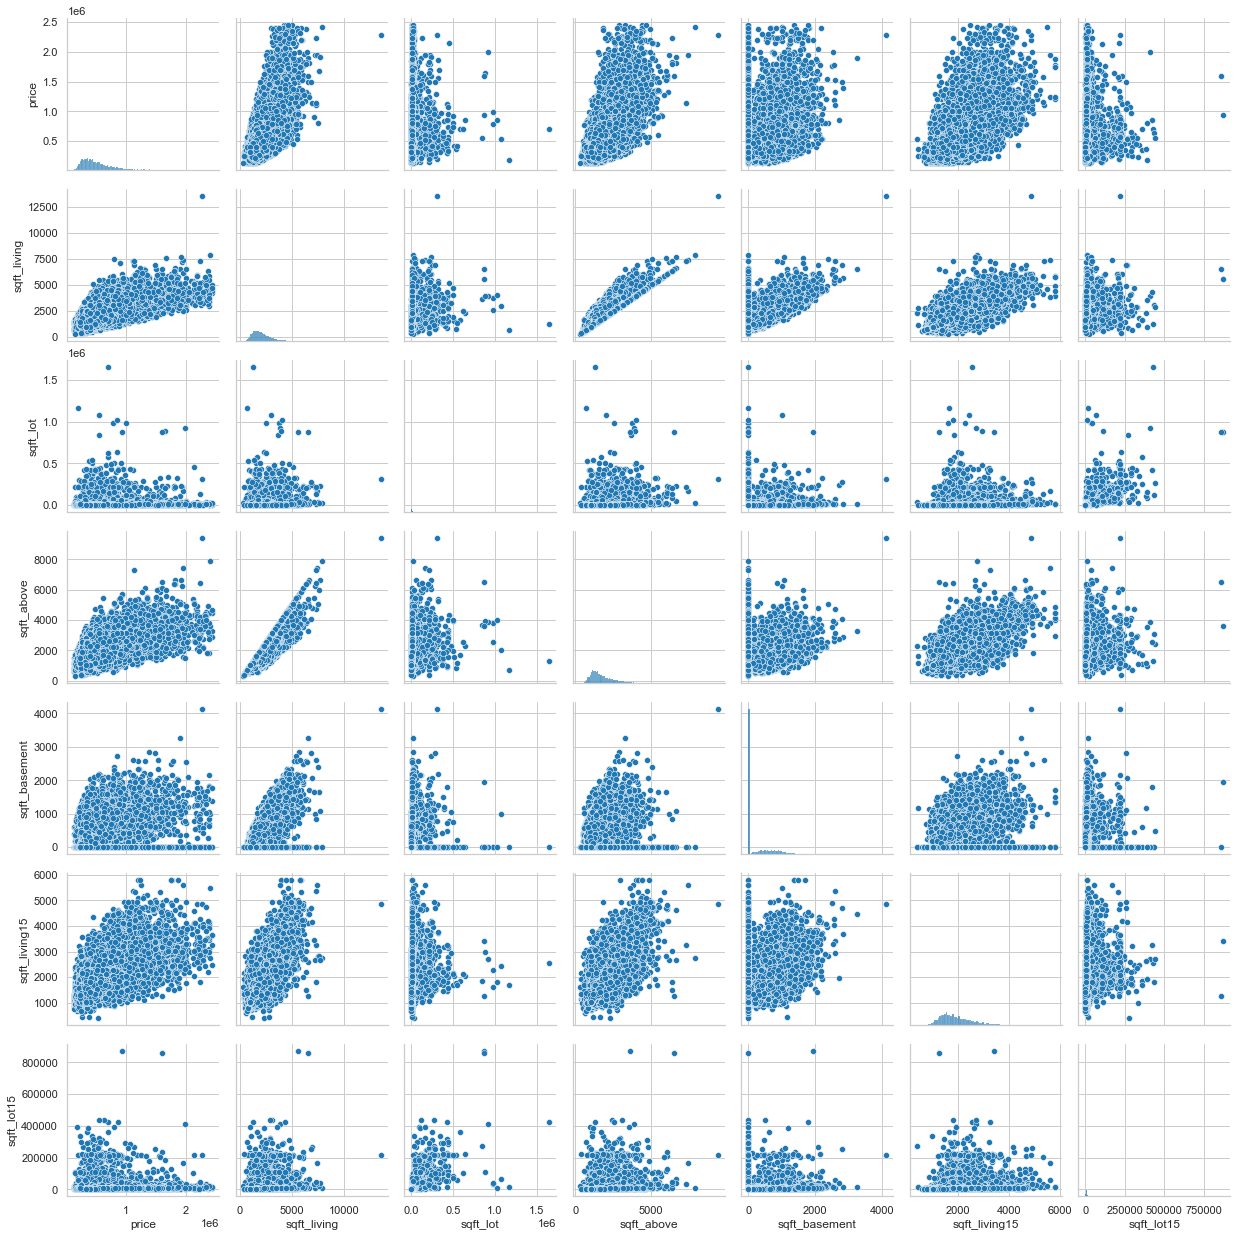

In [22]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                 'sqft_living15', 'sqft_lot15']])
plt.show()

sqft_lot and sqft_lot15 are not correlted linearly with price

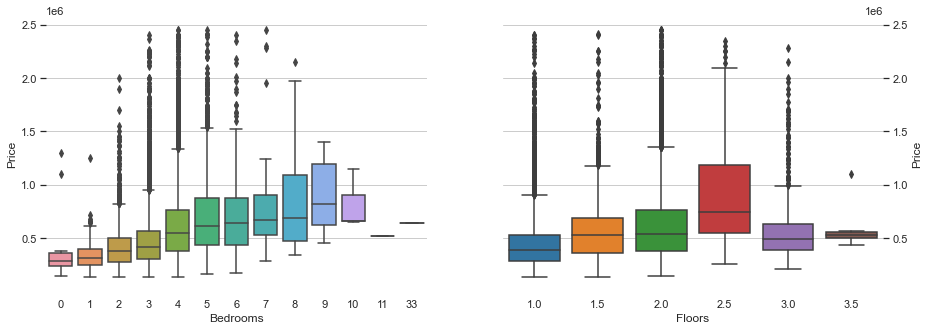

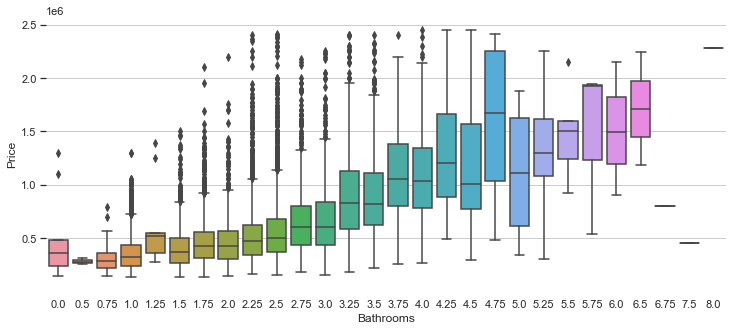

In [23]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y = df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y = df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

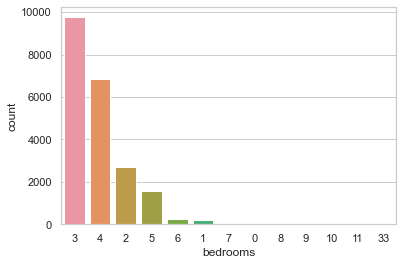

In [24]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

In [25]:
#limit dataset to properties with less than six bedrooms
df = df.loc[df['bedrooms'] < 7.0]
df = df.loc[df['bathrooms'] > 1.0]

(array([8215., 7856., 1248.,  134.,   17.]),
 array([ 590., 2048., 3506., 4964., 6422., 7880.]),
 <BarContainer object of 5 artists>)

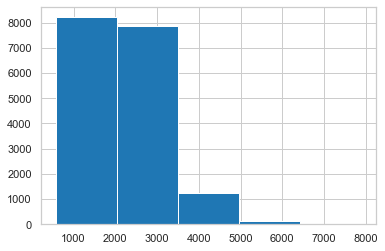

In [26]:
plt.hist('sqft_living',data=df,bins=5)

## Distribution plot and histograms

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

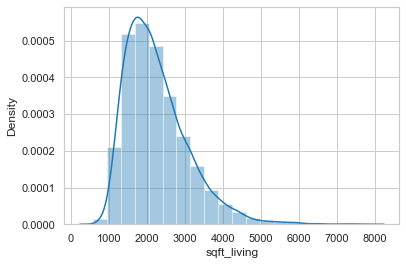

In [27]:
sns.distplot((df['sqft_living']), bins=20)

<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

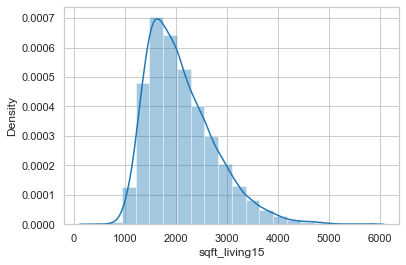

In [28]:
sns.distplot((df['sqft_living15']), bins=20)

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

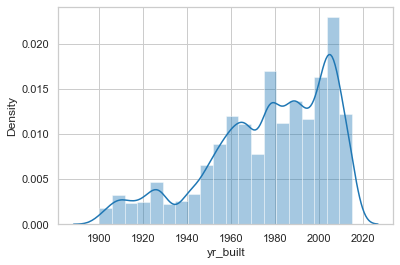

In [29]:
sns.distplot((df['yr_built']), bins=20)

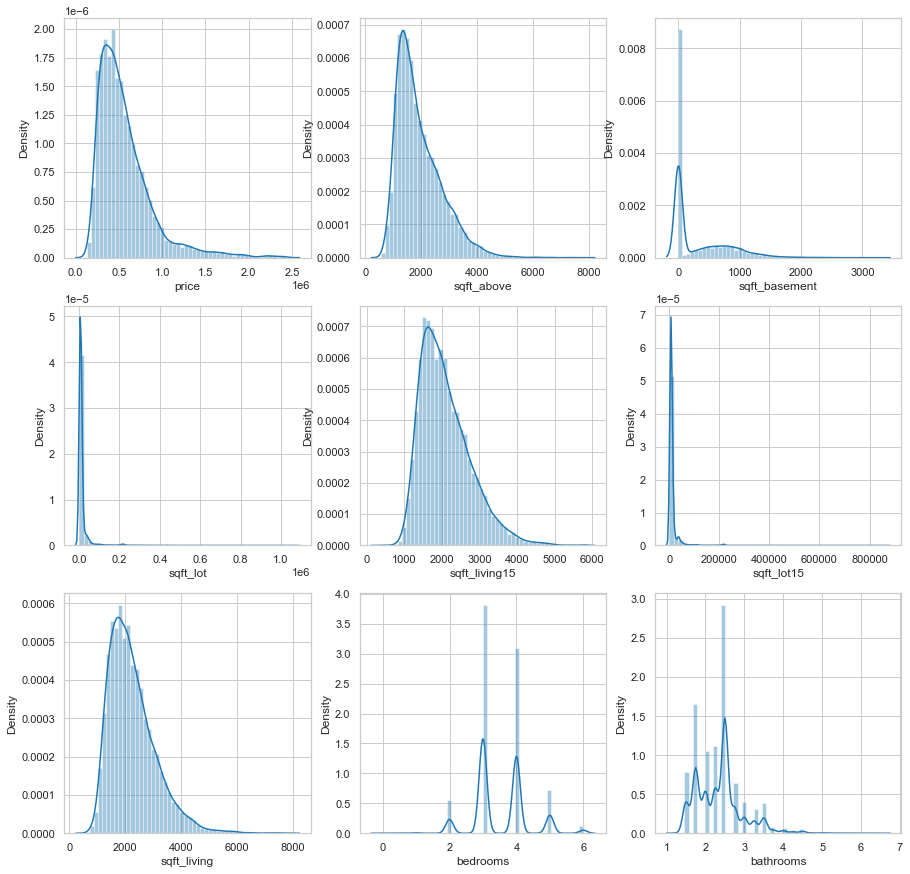

In [30]:
fig, axes = plt.subplots(ncols=3, nrows=3,figsize=(15,15))

for i, ax in zip(range(9), axes.flat):
    sns.distplot(df[features[i]], ax=ax, kde=True)
plt.show()

In [31]:
#df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)

In [32]:
df.info() #Ensure those columns were dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17470 entries, 1 to 21611
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17470 non-null  float64
 1   bedrooms       17470 non-null  int64  
 2   bathrooms      17470 non-null  float64
 3   sqft_living    17470 non-null  int64  
 4   sqft_lot       17470 non-null  int64  
 5   floors         17470 non-null  float64
 6   waterfront     17470 non-null  int64  
 7   view           17470 non-null  int64  
 8   condition      17470 non-null  int64  
 9   grade          17470 non-null  int64  
 10  sqft_above     17470 non-null  int64  
 11  sqft_basement  17470 non-null  int64  
 12  yr_built       17470 non-null  int64  
 13  zipcode        17470 non-null  int64  
 14  sqft_living15  17470 non-null  int64  
 15  sqft_lot15     17470 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.3 MB


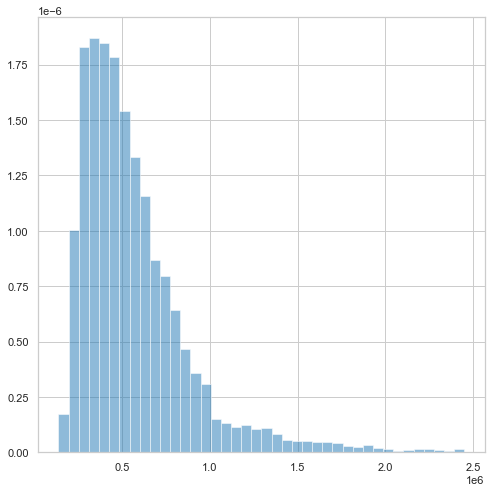

In [33]:
# histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()


There is a upper ended tail to the normal distribution for price

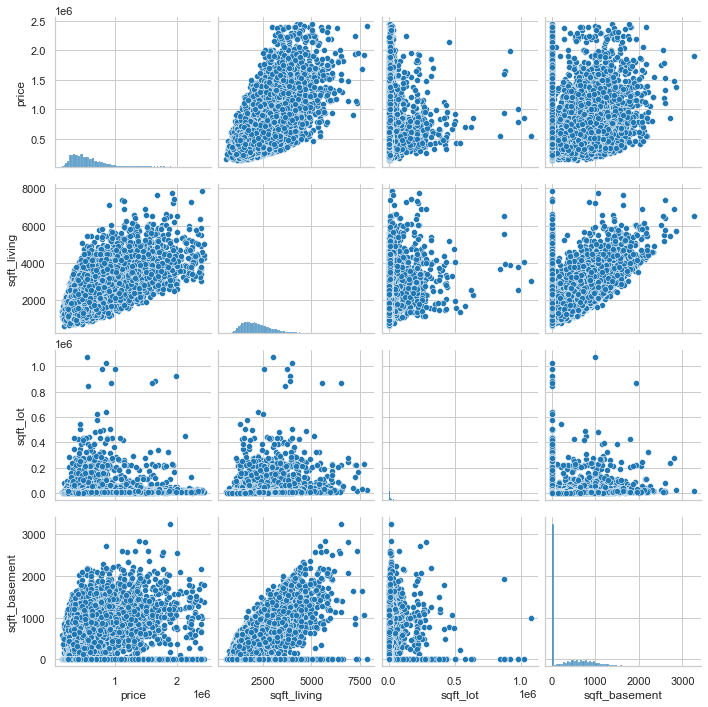

In [34]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_basement']])
plt.show()

## Data transformations

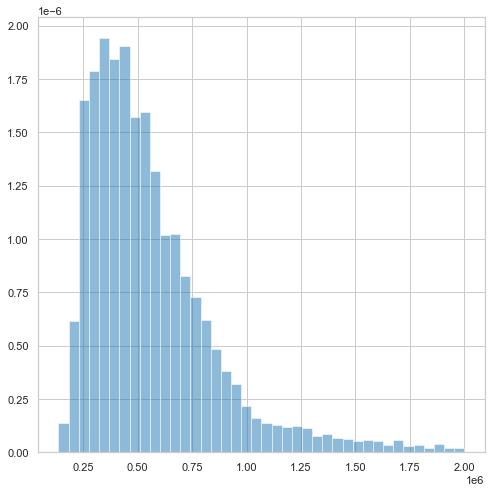

In [35]:
df = df.loc[df['price'] > 100000]
df = df.loc[df['price'] < 2000000]
df.describe() 
#Repeat histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()

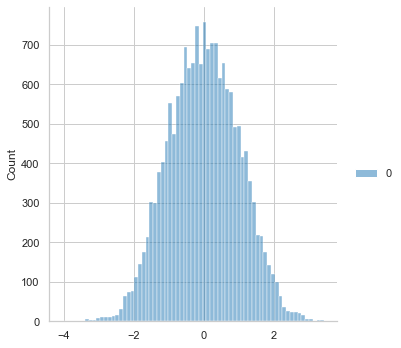

In [36]:
pt = PowerTransformer()
sqft_living_transformed=pt.fit_transform(df['sqft_living'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

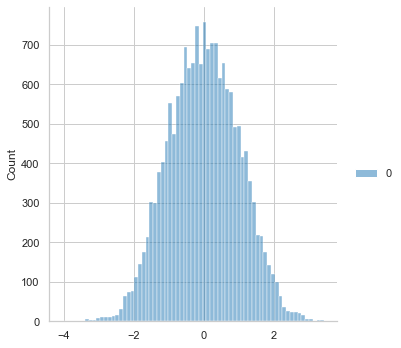

In [37]:
sqft_living15_transformed=pt.fit_transform(df['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(sqft_living_transformed)

In [38]:
df['sqft_living_transformed'] = sqft_living_transformed

In [39]:
type(df['sqft_living_transformed'])

pandas.core.series.Series

In [40]:
df['log_sqft_lot'] = df['sqft_lot'].copy()
df['log_sqft_lot'] = df['log_sqft_lot'].map(lambda x: np.log(x))

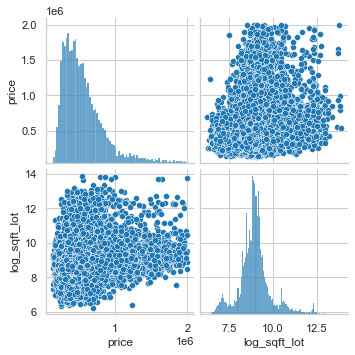

In [41]:
sns.pairplot(df[['price', 'log_sqft_lot']])
plt.show()

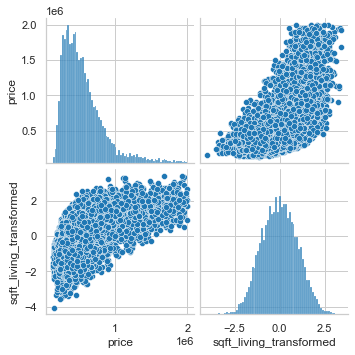

In [42]:
sns.pairplot(df[['price', 'sqft_living_transformed']])
plt.show()

In [43]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df[['price', 'bedrooms', 'sqft_living_transformed', 'log_sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'waterfront']].corr()



,price,bedrooms,sqft_living_transformed,log_sqft_lot,floors,condition,sqft_basement,yr_built,waterfront
price,1.000000,0.259793,0.615974,0.169178,0.199549,0.049980,0.240874,-0.047345,0.158014
bedrooms,0.259793,1.000000,0.548970,0.203707,0.031292,0.037782,0.251288,-0.011374,-0.030844
sqft_living_transformed,0.615974,0.548970,1.000000,0.392804,0.210966,-0.055507,0.339007,0.161305,0.040771
log_sqft_lot,0.169178,0.203707,0.392804,1.000000,-0.287543,0.088707,0.087446,-0.067817,0.053712
floors,0.199549,0.031292,0.210966,-0.287543,1.000000,-0.313117,-0.383665,0.465813,0.010288
condition,0.049980,0.037782,-0.055507,0.088707,-0.313117,1.000000,0.220163,-0.455897,0.014931
sqft_basement,0.240874,0.251288,0.339007,0.087446,-0.383665,0.220163,1.000000,-0.284182,0.035273
yr_built,-0.047345,-0.011374,0.161305,-0.067817,0.465813,-0.455897,-0.284182,1.000000,-0.048254
waterfront,0.158014,-0.030844,0.040771,0.053712,0.010288,0.014931,0.035273,-0.048254,1.000000


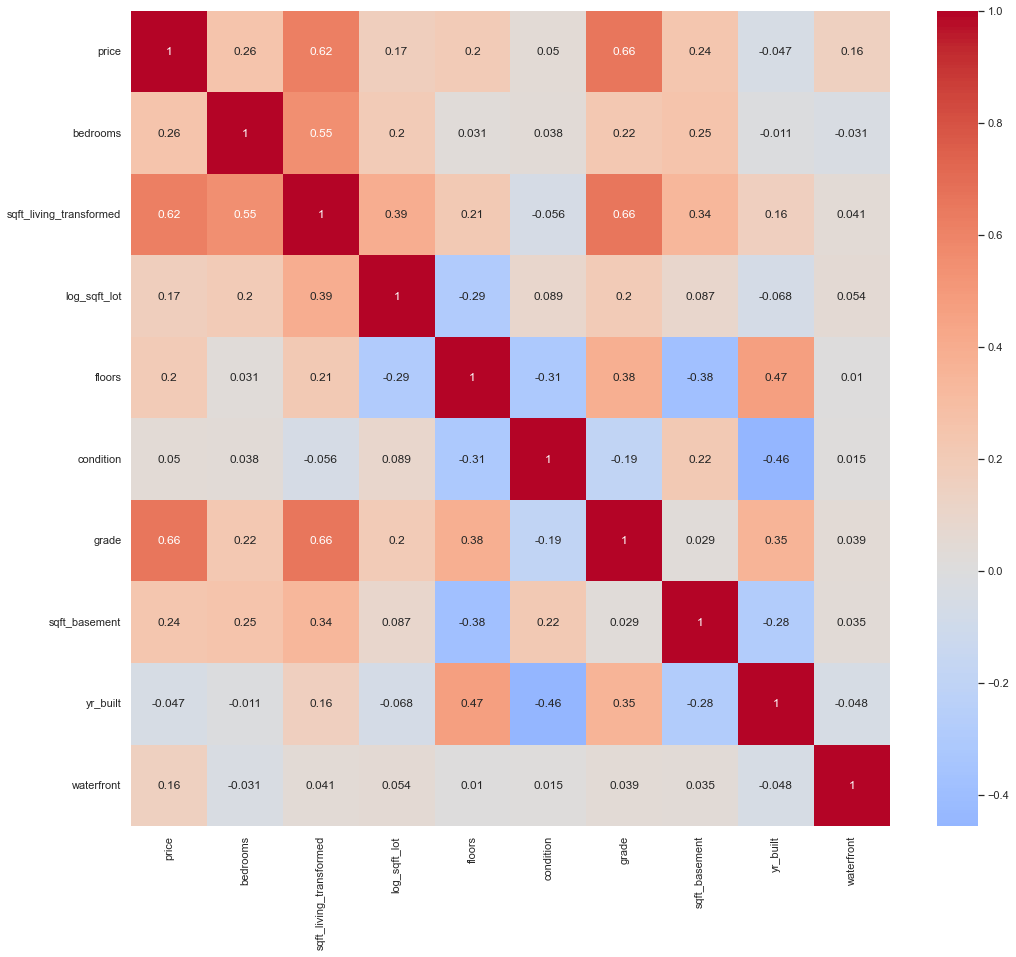

In [44]:
plt.subplots(figsize=(17,15))
sns.heatmap(df[['price', 'bedrooms', 'sqft_living_transformed', 'log_sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'waterfront']].corr(), 
        center=0,annot=True, cmap='coolwarm')
plt.show()

## Modeling

In [45]:
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

df = df.drop(['zipcode'], axis=1)
df = pd.concat([df, zipcode_dummies], axis=1)


In [46]:
y = df.price
features = df.drop(['price','sqft_living','sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above'], axis = 1)
X = features
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,sqft_living_transformed,log_sqft_lot,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
1,3,2.25,2.0,0,0,3,7,400,1951,0.584374,8.887653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,0,0,5,7,910,1965,-0.192618,8.517193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,0,0,3,8,0,1987,-0.649278,8.997147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4,4.50,1.0,0,0,3,11,1530,2001,2.564284,11.532042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,2.25,2.0,0,0,3,7,0,1995,-0.587568,8.827468,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,4,3.50,2.0,0,0,3,9,910,2009,1.439138,8.881836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21607,3,2.50,2.0,0,0,3,8,130,2008,-1.409368,7.165493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21608,3,2.50,3.0,0,0,3,8,0,2009,-0.931648,7.030857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21609,4,2.50,2.0,0,0,3,8,0,2014,0.282377,8.667852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [47]:
formula = 'y ~ bedrooms + bathrooms + floors + waterfront + view + condition + grade +  sqft_basement  \
            + yr_built  + sqft_living_transformed +  log_sqft_lot + zip_98002 \
            + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008 \
            + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023 \
            + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031 \
            + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98038 + zip_98040 \
            + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056 \
            + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074 \
            + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105 \
            + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115 \
            + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125 \
            + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148 \
            + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188 \
            + zip_98198 + zip_98199'
smodel = ols(formula = formula, data = features).fit()
smodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     942.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:45:44   Log-Likelihood:            -2.2900e+05
No. Observations:               17378   AIC:                         4.582e+05
Df Residuals:                   17298   BIC:                         4.588e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.182e+05   1.16e+05      5.334      0.000    3.91e+05    8.45e+05
bedrooms                -8794.2749   1530.325     -5.747      0.000   -1.18e+04   -5794.684
bathrooms                5.402e+04   2476.068     21.818      0.000    4.92e+04    5.89e+04
floors                  -1.587e+04   2827.187     -5.614      0.000   -2.14e+04   -1.03e+04
waterfront               3.737e+05   1.43e+04     26.151      0.000    3.46e+05    4.02e+05
view                     5.087e+04   1488.933     34.162      0.000    4.79e+04    5.38e+04
condition                2.385e+04   1775.025     13.434      0.000    2.04e+04    2.73e+04
grade                    8.463e+04   1510.639     56.023      0.000    8.17e+04    8.76e+04
sqft_basement             -37.4650      3.119    -12.013      0.000     -43.578     -31.352
yr_built                 -641.4609     56.988    -11.256      0.000    -753.164    -529.758
sqft_living_transformed  8.621e+04   1995.483     43.200      0.000    8.23e+04    9.01e+04
log_sqft_lot                 3e+04   1604.131     18.699      0.000    2.69e+04    3.31e+04
zip_98002               -4.853e+04   1.29e+04     -3.749      0.000   -7.39e+04   -2.32e+04
zip_98003               -9.322e+04    1.1e+04     -8.484      0.000   -1.15e+05   -7.17e+04
zip_98004                6.369e+05   1.09e+04     58.664      0.000    6.16e+05    6.58e+05
zip_98005                2.516e+05   1.24e+04     20.297      0.000    2.27e+05    2.76e+05
zip_98006                2.113e+05   9473.588     22.309      0.000    1.93e+05     2.3e+05
zip_98007                1.758e+05   1.34e+04     13.075      0.000    1.49e+05    2.02e+05
zip_98008                1.735e+05   1.09e+04     15.967      0.000    1.52e+05    1.95e+05
zip_98010               -2.045e+04    1.6e+04     -1.276      0.202   -5.19e+04     1.1e+04
zip_98011                6.504e+04   1.18e+04      5.508      0.000    4.19e+04    8.82e+04
zip_98014                1.541e+04   1.53e+04      1.009      0.313   -1.45e+04    4.54e+04
zip_98019                2.379e+04   1.21e+04      1.971      0.049     132.027    4.74e+04
zip_98022               -9.791e+04   1.22e+04     -8.035      0.000   -1.22e+05    -7.4e+04
zip_98023               -1.148e+05   9478.550    -12.114      0.000   -1.33e+05   -9.62e+04
zip_98024                9.935e+04    1.8e+04      5.529      0.000    6.41e+04    1.35e+05
zip_98027                1.096e+05   9752.475     11.241      0.000    9.05e+04    1.29e+05
zip_98028                 5.91e+04   1.08e+04      5.469      0.000    3.79e+04    8.03e+04
zip_98029                1.446e+05   1.02e+04     14.132      0.000    1.25e+05    1.65e+05
zip_98030               -7.033e+04    1.1e+04     -6.367      0.000    -9.2e+04   -4.87e+04
zip_98031               -6.193e+04   1.08e+04  

In [48]:
#display adjusted R-squared
print(smodel.rsquared_adj)

0.8106750468963385


### Modeling test train split

In [49]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [50]:
# Scale indepedenent variable
# Standardize features by removing the mean and scaling to unit variance.
std_scaler     = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled  = std_scaler.transform(X_test) # use the same parameters from the training set [same scaling]

In [51]:
print(X_train_scaled.mean(axis=0), " \n", X_train_scaled.std(axis=0))



[-2.24308131e-16 -3.23027074e-16 -2.92067879e-18 -1.34351224e-17
 -5.54928970e-18 -3.70342070e-16  2.83597910e-16 -6.42549334e-17
 -3.90173479e-15 -1.05144436e-17  6.13196512e-16  0.00000000e+00
 -3.91370958e-17 -6.71756121e-18  4.90674037e-17  4.38101818e-19
  2.04447515e-18  4.67308606e-18 -1.16827152e-18 -1.66478691e-17
  1.16827152e-18 -3.21274667e-18  7.00962909e-18 -2.39495661e-17
 -4.14736388e-17  3.09591952e-17 -1.40192582e-17  2.80385164e-17
 -8.76203637e-19 -2.10288873e-17 -2.92067879e-17  5.84135758e-18
  1.73780388e-17  1.05144436e-17  8.17790061e-18  1.86923442e-17
 -4.67308606e-18  5.57849649e-17  2.74543806e-17 -6.54232049e-17
 -6.89280194e-17 -2.86226521e-17 -3.38798740e-17  4.11815709e-17
  1.10985794e-17 -2.36574982e-17  1.46033939e-17  3.79688243e-17
  2.51178376e-17 -4.46863855e-17 -4.41022497e-17 -1.28509867e-17
 -1.60637333e-17  8.67441600e-17 -1.28509867e-17  9.93030788e-18
  5.95818473e-17 -1.10985794e-17 -6.30866618e-17 -3.68005527e-17
  1.57716655e-17 -1.16827

In [52]:
model = LinearRegression()           # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [53]:
model.coef_

array([ -6951.46256878,  29544.01499072,  -9760.96336498,  29751.4105519 ,
        38849.3793576 ,  14685.4664329 ,  86887.55464075, -18743.54589972,
       -13978.5678119 ,  88310.12866492,  29175.04535632,   2371.13977357,
        -1856.05278114,  88480.80950296,  32824.28411688,  45190.95783169,
        22220.40307097,  29603.53763689,   3188.25642864,  14939.555411  ,
         8035.17926966,   9936.59047169,  -1919.20883058,  -5653.56097487,
        11514.16919025,  27651.10453556,  16997.63350839,  28107.06989573,
         1426.37290958,   2175.82166788,  -1251.14063083,  53935.28691849,
        33613.05743751,   9075.42904965,  38045.5271305 ,  57156.77992515,
         1945.6940643 ,   9873.70653828,  44356.45530029,  35202.07740133,
         4412.0877359 ,  15101.71943973,   4427.33343018,  18715.45045147,
        16468.45826383,   1718.8664731 ,  20068.68861391,  31093.07845605,
        29757.09071737,  13698.4075425 ,  -4373.92958538,  32396.7020979 ,
        56436.34827647,  

In [54]:
y_pred       = model.predict(X_test_scaled)   # model prediction [test]
y_pred_train = model.predict(X_train_scaled)  # model prediction [train]

In [55]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

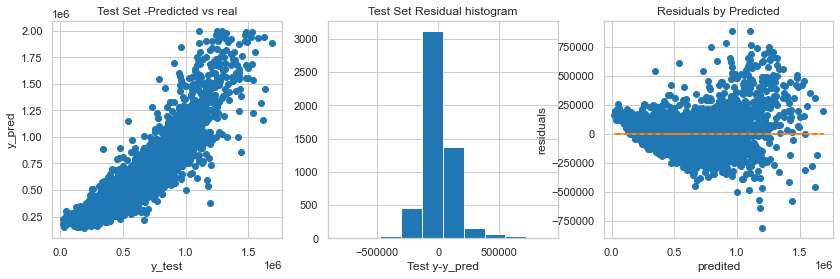

In [56]:

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

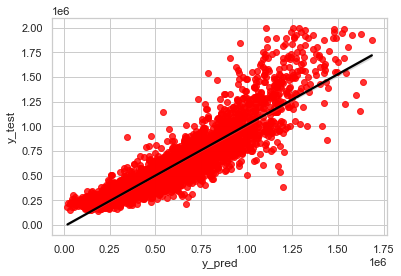

In [57]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error metrics

In [58]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
print(mse(y_train,y_pred_train, squared = False))

16236614420.231405
86486.98777617686
121008.48285351742


In [59]:
R2=r2_score(y_test,y_pred)
R2

0.8195921834642033

In [60]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.8167804504965696

#### Feature importance

In [61]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [62]:
features_importances

,Attribute,Importance
13,zip_98004,88480.809503
9,sqft_living_transformed,88310.128665
6,grade,86887.554641
58,zip_98112,61375.821221
35,zip_98040,57156.779925
59,zip_98115,56492.008691
52,zip_98103,56436.348276
31,zip_98033,53935.286918
61,zip_98117,51500.472817
79,zip_98199,51391.435956


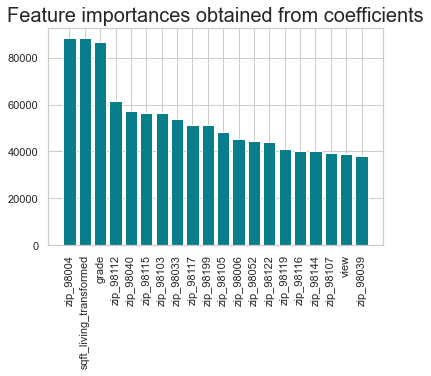

In [63]:
plt.bar(x=features_importances['Attribute'][0:20], height=features_importances['Importance'][0:20], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()